In [73]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# check the shape of dataset
df.shape

(7043, 21)

In [5]:
# print all column
pd.set_option('max_columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking the null values in the dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# checking the type of dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As  we see our dataset is having both categorical and numerical datatype

In [9]:
# checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************************************')

9661-JALZV    1
6171-ZTVYB    1
6022-KOUQO    1
7794-JASDG    1
2673-CXQEU    1
             ..
9975-SKRNR    1
1184-PJVDB    1
2135-RXIHG    1
2235-EZAIK    1
6933-FHBZC    1
Name: customerID, Length: 7043, dtype: int64
**********************************************************
Male      3555
Female    3488
Name: gender, dtype: int64
**********************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**********************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**********************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**********************************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
*

In [10]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

we can observe that the "TotalCharges" has the continuous data but when we checked the data type its showing object data type due to some reason also if we notice the value counts,11 rows of this column has blank data. let's handle this column.

In [11]:
# checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column ha space as values but it has showing 0 missing values in this columns, let's fill this column by some values and then we will convert this into float type.

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
           ..
6548.65     1
601.55      1
2763        1
815.55      1
1686.15     1
Name: TotalCharges, Length: 6530, dtype: int64

In [13]:
# converting the object data type into float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [14]:
# let's check the null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since we have filled the blank spaces in TotalCharges column with nan values, it's showing 11 null values in that column. Replacing the NAN values using mean method as the column TotalCharges is continuous in nature. Let's handle this column

In [15]:
# checking teh mean of TotalCharges column
print("The mean value of TotalCharges is:",df["TotalCharges"].mean())

The mean value of TotalCharges is: 2283.3004408418697


In [16]:
# filling the null values in TotalCharges with its mean
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

Here we have checked the mean value of TotalCharges column and replaced the missing values with its mean.

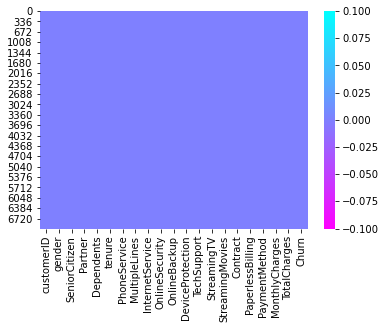

In [17]:
# let's check the null values again
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

In [18]:
# to get the good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we see there are 17 object columns

In [19]:
# separting numerical and categorical columns
#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

Categorical columns are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']




In [20]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical_columns are:\n",numerical_col)

Numerical_columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


we will use encoding techniques to convert categorical column into numerical

In [21]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


as we see customer id is having all unique value and it is not help in  prediction lets drop this column

In [22]:
#Dropping CustomerID column
df.drop('customerID',axis=1,inplace=True)

In [23]:
# Checking the list of counts of target
df['Churn'].unique() 

array(['No', 'Yes'], dtype=object)

There are two categories present in the target column namely "No" and "Yes".

In [24]:
#Checking the unique values in target column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

In [25]:
#Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The counts of all the 3 columns are same which means there are no missing values in the dataset.
The mean value is greater than the median(50%) in tenure and TotalCharges columns which means the data is skewed to right in these columns.
The data in the column MonthlyCharges have mean value less than median that means the data is skewed to left.
By summarising the data we can observe there is huge difference between 75% and max hence there are outliers present in the data which we will remove them later on using appropriate methods.
We can also notice the Standard deviation, min, 25% percentile values from this describe method.

### DATA VISUALIZATION

Male      3555
Female    3488
Name: gender, dtype: int64

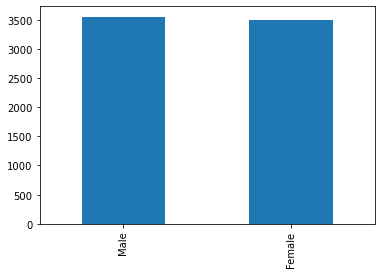

In [26]:
df['gender'].value_counts().plot(kind='bar')
df['gender'].value_counts()

The count of male is 3555 which is high compared to count of female which has 3488 counts.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


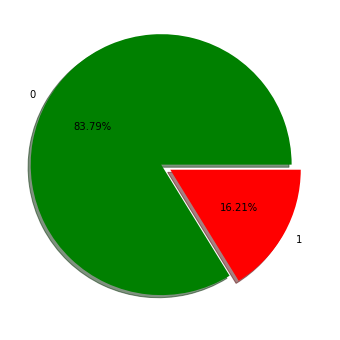

In [27]:
print(df['SeniorCitizen'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["g","red"]
ax.pie(df['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0),colors=colors)
plt.show()

Here 0 represents the non senoir citizens and 1 represents the senior citizens. The count of 0 is high in data compared to 1 which means the number non-seniorcitizens are quite high compared to senior citizens data in the given dataset. Around 83% of the customers are non-senior citizens and only 16% are senior citizens.

No     3641
Yes    3402
Name: Partner, dtype: int64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


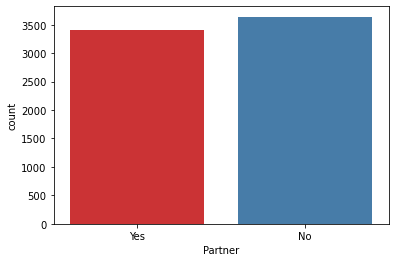

In [28]:
# visualizing how many customers have their partners
print(df["Partner"].value_counts())
sns.countplot(df["Partner"],palette="Set1")
plt.show()

The count for partner details are almost similar and the customers who do not have partners are bit higher than who have partners.

No     4933
Yes    2110
Name: Dependents, dtype: int64


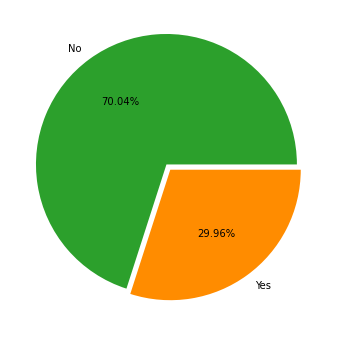

In [29]:
# visualize the count of Dependent
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors=["tab:green","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0),colors=colors)
plt.show()

The customers who have dependents are very less in counts that means they do not have anyone dependent on them. Here around 70% of customers have dependents only 29.96% have no dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


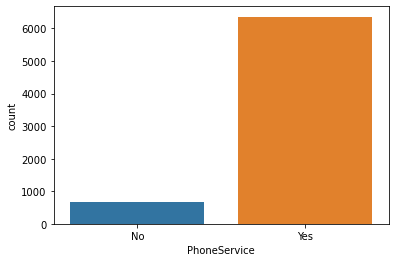

In [30]:
# visualizing how many customers have phone service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"])
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


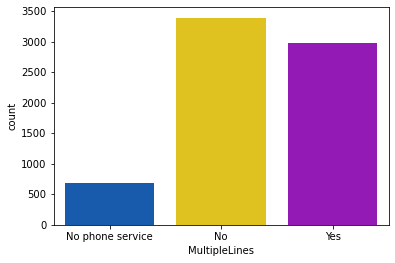

In [31]:
# visualizing count of multiple lines
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="prism")
plt.show()


The customers who have phone services from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


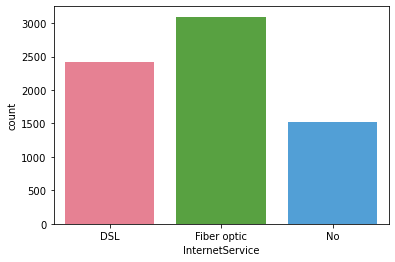

In [32]:
# visualizing how many customers have internet services
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="husl")
plt.show()

Most of the customers have chosen to get Fiber optic internet followed by DSL, but there are many customers who do not get an internet service

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


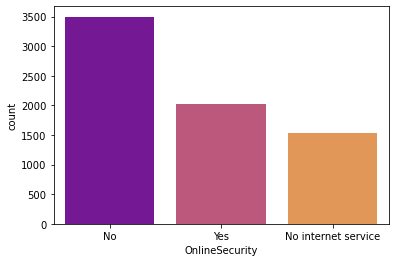

In [33]:
# visualizing how many customers have online security
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"],palette="plasma")
plt.show()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


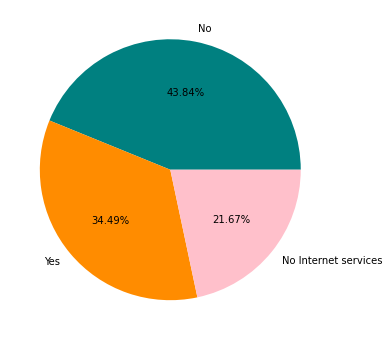

In [34]:
# visualizing how many customers have online backup
print(df['OnlineBackup'].value_counts())
labels='No','Yes',"No Internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["teal","darkorange","pink"]
ax.pie(df['OnlineBackup'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


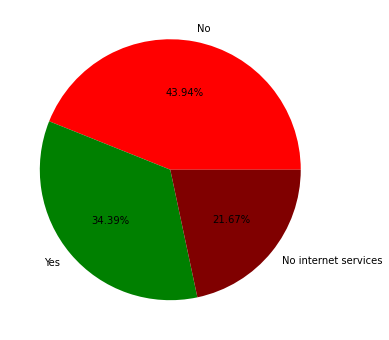

In [35]:
# visualizing how many customers have deviceprotection
print(df["DeviceProtection"].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["r","g","maroon"]
ax.pie(df['DeviceProtection'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=False,colors=colors)
plt.show()

From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. And the customers who do not have internet access they do not need any device protection

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


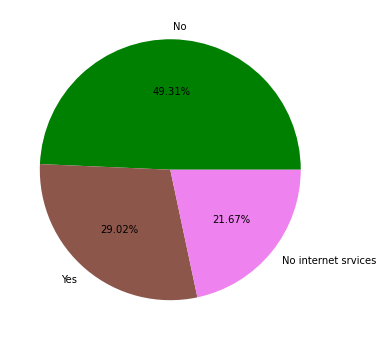

In [36]:
# visualizing how many customers have Techsupport 
print(df['TechSupport'].value_counts())
labels='No','Yes',"No internet srvices"
fig, ax = plt.subplots(figsize=(6,6))
colors=['g','tab:brown','violet']
ax.pie(df['TechSupport'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

The customers who do not need any technical support are high in counts compared to the customers who need technical support. Around 49% of the people do not need any technical support and only 29% needs.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

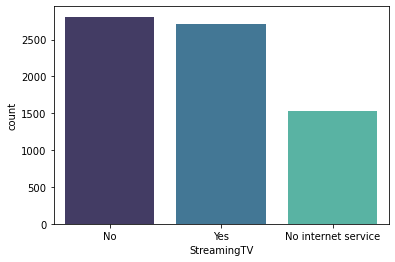

In [37]:
# visualizing how many customers have streamingtv
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="mako")
plt.show

The customers who do not use streamingTV have little bit high in numbers than the customers who do use StreamingTV. And the customers who do not own internet they do not have this service much.


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


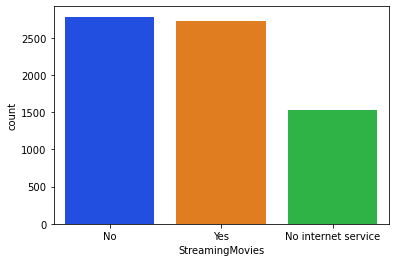

In [38]:
# visualizing how many customers have streamingmovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="bright")
plt.show()

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


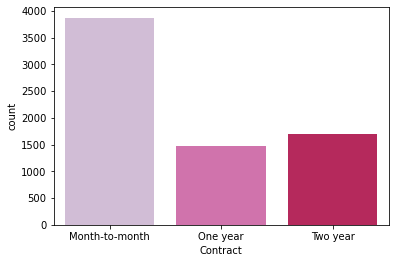

In [39]:
# visualizing how many customers have contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="PuRd")
plt.show()

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract but where as next prefer goes to two year contract rather than one year contract

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


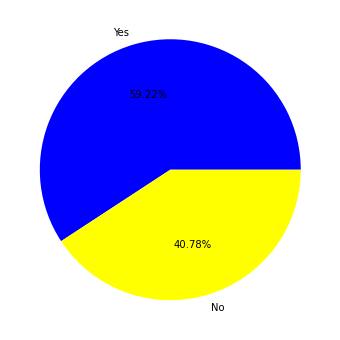

In [40]:
# visualizing how many customers have paymentmethod
print(df['PaperlessBilling'].value_counts())
labels='Yes','No'
fig, ax = plt.subplots(figsize=(6,6))
colors=["blue","yellow"]
ax.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False, colors=colors)
plt.show()

Most of the customers prefer paperless billing and average number of customers who do not prefer paper less billing, they may like to receive paper billing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


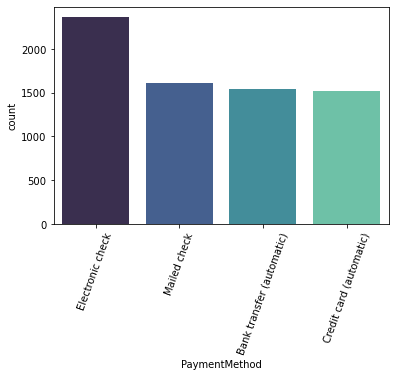

In [41]:
# visualizing how many customers have contract
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="mako")
plt.xticks(rotation=70)
plt.show()

Most of the customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have average in count

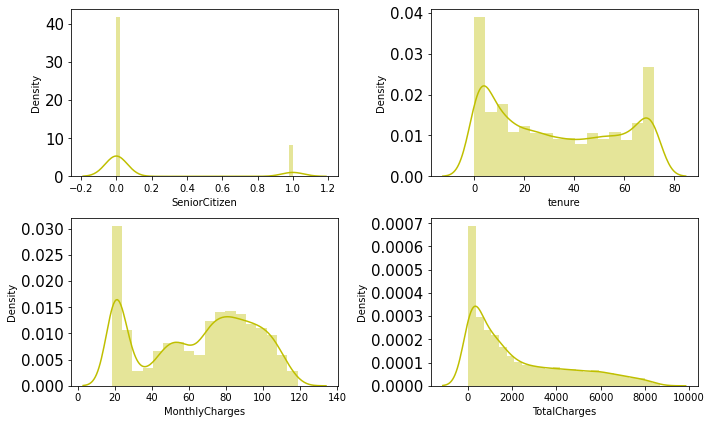

In [42]:
# let's check how the data has been distributed in remaining columns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="y")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=15)
    plotnumber+=1
plt.tight_layout()

there is skewness in our dataset

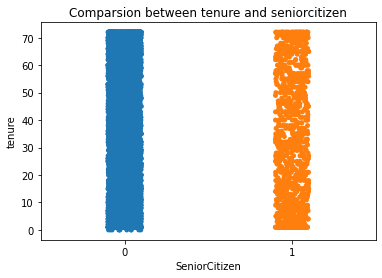

In [43]:
# comparing tenure and seniorcitizen
plt.title("Comparsion between tenure and seniorcitizen")
sns.stripplot(x= "SeniorCitizen",y="tenure",data = df)
plt.show()

There is no significant difference between the features(tenure&seniorcitizen), here both the feature are in equal length

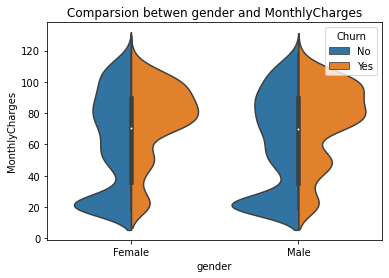

In [44]:
# comparing gender and monthlycharges
plt.title("Comparsion betwen gender and MonthlyCharges")
sns.violinplot(x= "gender",y="MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Both male and female customers with monthly charges above 60 have high chances of getting churned

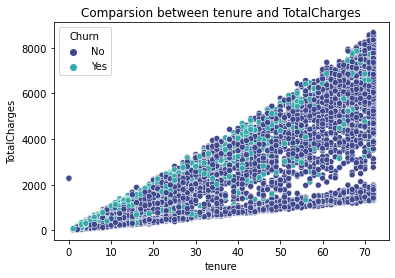

In [45]:
# comparing tenure and TotalCharges
plt.title("Comparsion between tenure and TotalCharges")
sns.scatterplot(x= "tenure",y= "TotalCharges", data = df,hue="Churn",palette="mako")
plt.show()

Here we can notice the strong linear relation between the features.
As the tenure increases, TotalCharges also increases rapidly. If the customers have low tenure services then there is high chance of churn.

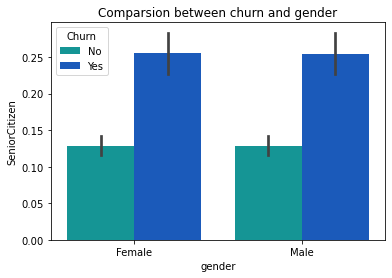

In [46]:
# comparing gender and seniorcitizen on the basis of churn
plt.title("Comparsion between churn and gender")
sns.barplot(x="gender",y="SeniorCitizen",data=df,palette="winter_r",hue="Churn")
plt.show()

There is no significant difference between the columns. The customer's churns remains unaffected in gender and SeniorCitizen case

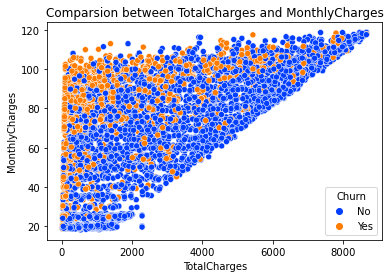

In [47]:
# comparing totalcharges and monthly charges
plt.title('Comparsion between TotalCharges and MonthlyCharges')
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue="Churn",palette="bright")
plt.show()

There is a linear relation between the features. The customers with high monthly charges have high tendancy to stop the services since they have high total charges.
Also the if the customers ready to contribute with the monthly charges then there is an increment in the total charges.

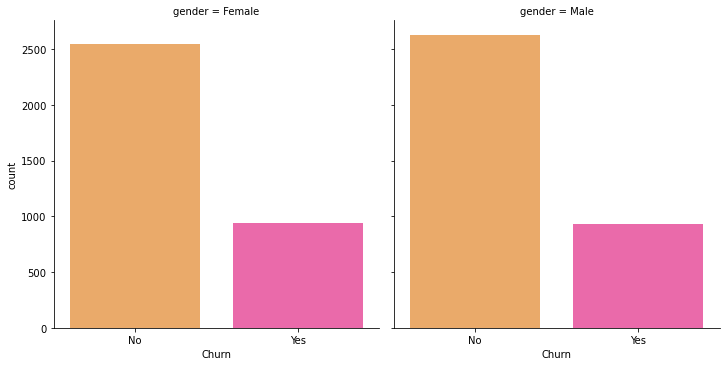

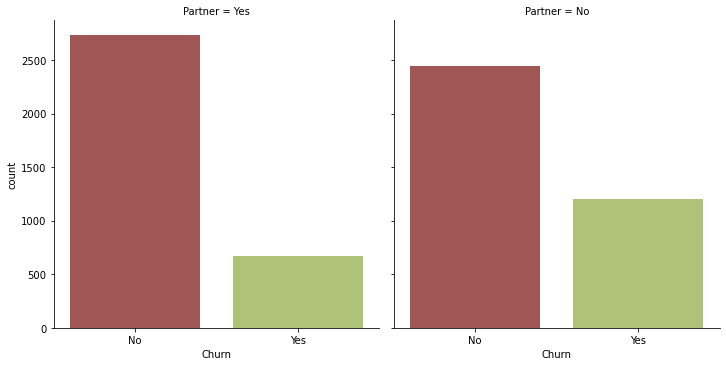

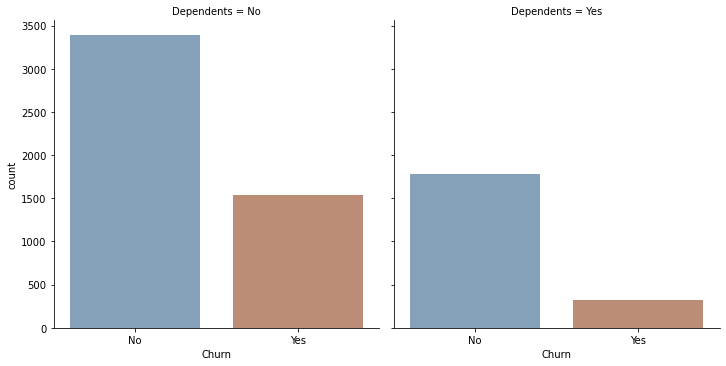

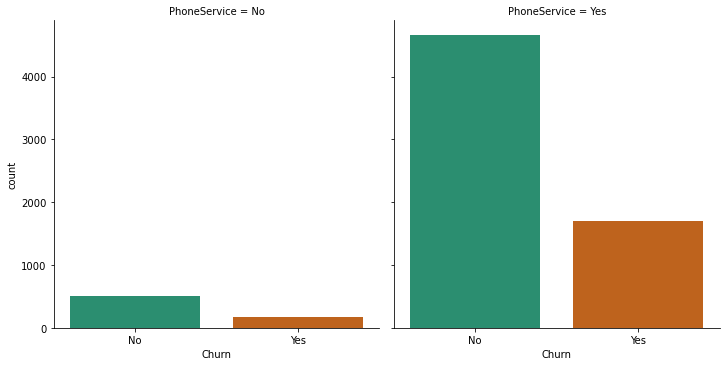

In [48]:
#checking churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# checking churn level and gender
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

#checking churn level in dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="twilight_shifted",kind="count")
            
#checking churn level in phoneservice
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()

In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.
In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.
The customers who do not have any dependency have high churn rate compared to the customers who have dependents.
In the last plot we can notice the customers who have phone service have high tendency of getting churned

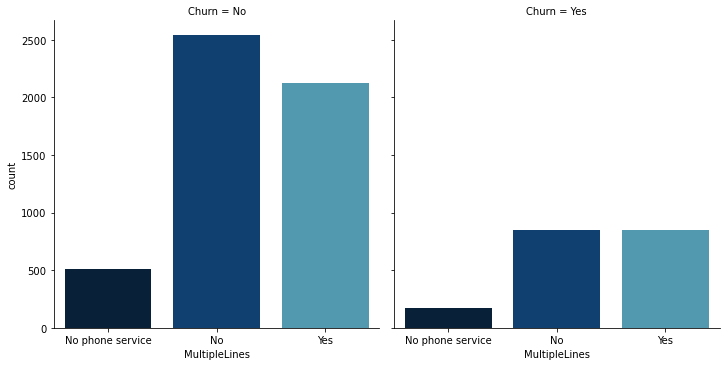

In [49]:
#checking churn level and multiplelines
sns.catplot(x='MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services

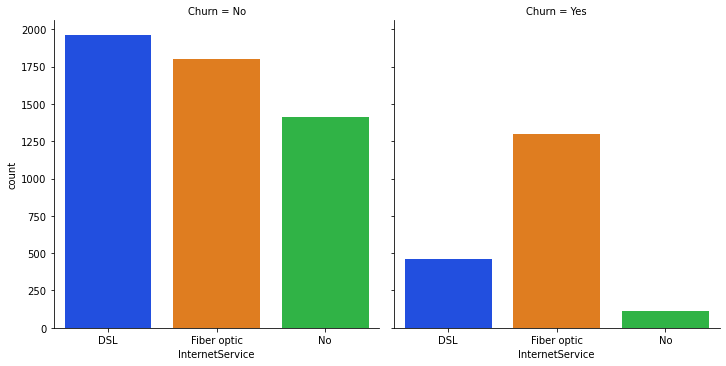

In [50]:
#checking churn level in internetservice
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=df)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

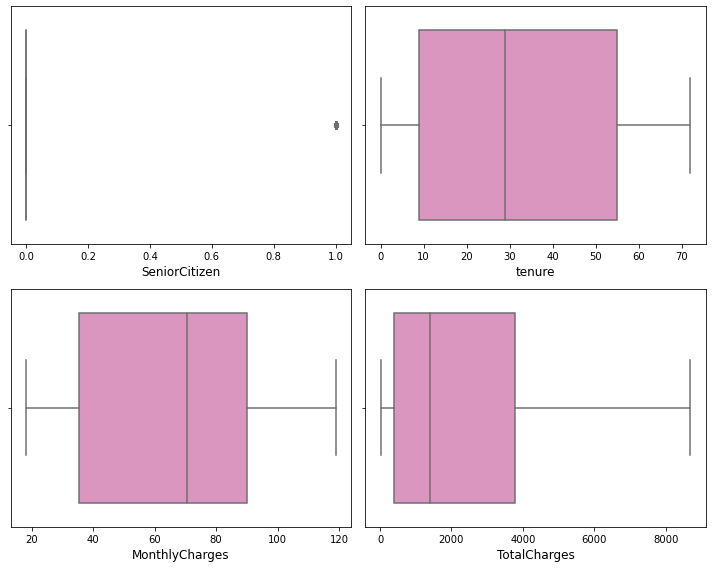

In [51]:
# let's check the outliers by plotting bbox plot

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=12)
        plt.yticks(rotation=0,size=12)
    plotnumber+=1
    plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

In [52]:
# checking for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

## Encoding the categorical columns using Ordinal Encoding

In [53]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


Now we have converted the categorical columns into numerical columns using Ordinal Encoding method

<AxesSubplot:>

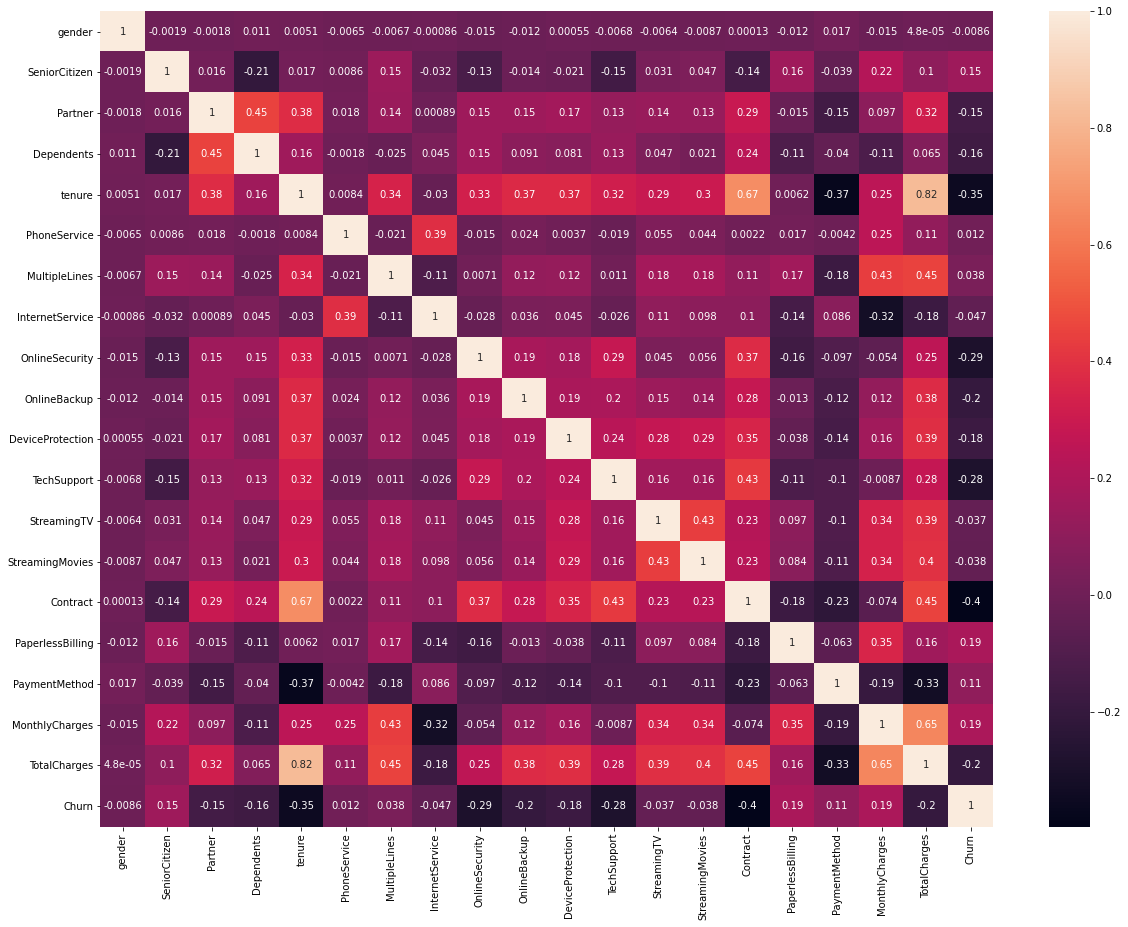

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True)

## Separting the feature and label into x and y

In [55]:
x= df.drop("Churn",axis=1)
y= df["Churn"]

In [56]:
#dimension  of x
x.shape

(7043, 19)

In [57]:
#dimension of y
y.shape

(7043,)

### Feature Scaling using Standard Scalarization

In [58]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.129281
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.242808
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.855182
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872777


In [59]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001938,gender
1,1.149759,SeniorCitizen
2,1.461052,Partner
3,1.382351,Dependents
4,7.213411,tenure
5,1.622493,PhoneService
6,1.394323,MultipleLines
7,1.826632,InternetService
8,1.268868,OnlineSecurity
9,1.218713,OnlineBackup


By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [60]:
#dropping totalcharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [61]:
#Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

#let's check the values
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


All the columns have VIF less than 10 which means the data is free from multicollinearity problem. So we can move further to build our machine learning models

In [62]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

### Oversampling

In [63]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [64]:
# checking value count oftarget column
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Finally the data is also balanced then we can build our machine leaning classification models

#### Finding best random state

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Random_state",maxRS)

Best accuracy is  0.8634460547504026 on Random_state 79


We have got the best random state and maximum accuracy

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

### 1) Random Forest Classifier

In [67]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8515297906602255
[[1278  243]
 [ 218 1366]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1521
         1.0       0.85      0.86      0.86      1584

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



The accuracy for this model as 85.15%

### 2) Logistic Regression

In [68]:
# Checking accuracy for Logistic Regression Classifier

LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.777133655394525
[[1125  396]
 [ 296 1288]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1521
         1.0       0.76      0.81      0.79      1584

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



The accuracy for this model as 77.71%

### 3) Support Vector Machine Classifier

In [69]:
# checking accuracy for support vector machine classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8067632850241546
[[1175  346]
 [ 254 1330]]
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80      1521
         1.0       0.79      0.84      0.82      1584

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



The accuracy for this model as 80.67%

### 4) Gradient Boosting Classifier

In [70]:
# Checking accuracy for Gradient Boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8357487922705314
[[1231  290]
 [ 220 1364]]
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      1521
         1.0       0.82      0.86      0.84      1584

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



The accuracy for this model as 83.57%

### Cross Validation Score

In [74]:
#Importing library
from sklearn.model_selection import cross_val_score

In [75]:
# cv score for random forest classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8524455558590931


In [76]:
# cv score for logistic regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.7717455047246797


In [77]:
# cv score for support vector machine classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8000626221447036


In [78]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8346638554413787


I am choosing RFC as best model lets try to increse the accuracy by hyperparameter tuning

### Hyper Parameter Tuning

In [79]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'min_samples_split':[2,3],
              'n_estimators' : [50,100, 200, 300]}

In [82]:
GCV =GridSearchCV(RandomForestClassifier(),parameters,cv=4)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 50, 1000]})

In [84]:
GCV.best_params_

{'criterion': 'entropy',
 'min_samples_split': 3,
 'n_estimators': 300,
 'random_state': 10}

In [86]:
RFC = RandomForestClassifier(criterion='entropy', min_samples_split=3, n_estimators=300, random_state=10 )
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8557165861513688
[[1279  242]
 [ 206 1378]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1521
         1.0       0.85      0.87      0.86      1584

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



### Plotting ROC and compare AUC for all the models used

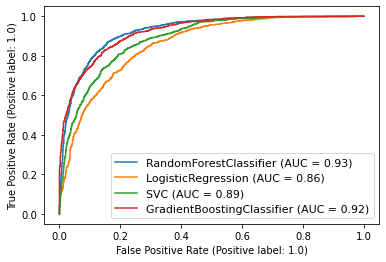

In [87]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(RFC,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

### Saving the model

In [88]:
import pickle
filename= 'Customer Churn Analysis'
pickle.dump(RFC, open(filename,'wb'))